# EEG Preprocessing Example  

Please refer to our [NeurotechEDU tutorial](http://learn.neurotechedu.com/preprocessing/) for a detailed explanation of the techniques shown here. 

We will be using the Python MNE library in this example: 

In [1]:
import mne
import numpy as np
%matplotlib inline  

First, load one of the MNE example datasets: 

In [2]:
path = mne.datasets.eegbci.load_data(3, 1)
path[0]

u'/home/pat/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R01.edf'

Now read the EDF file: 

In [3]:
raw = mne.io.read_raw_edf(path[0], preload=True)

Extracting edf Parameters from /home/pat/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R01.edf...
Setting channel info structure...
Creating Raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Ready.


Once the Raw file has been created, we can plot the data:

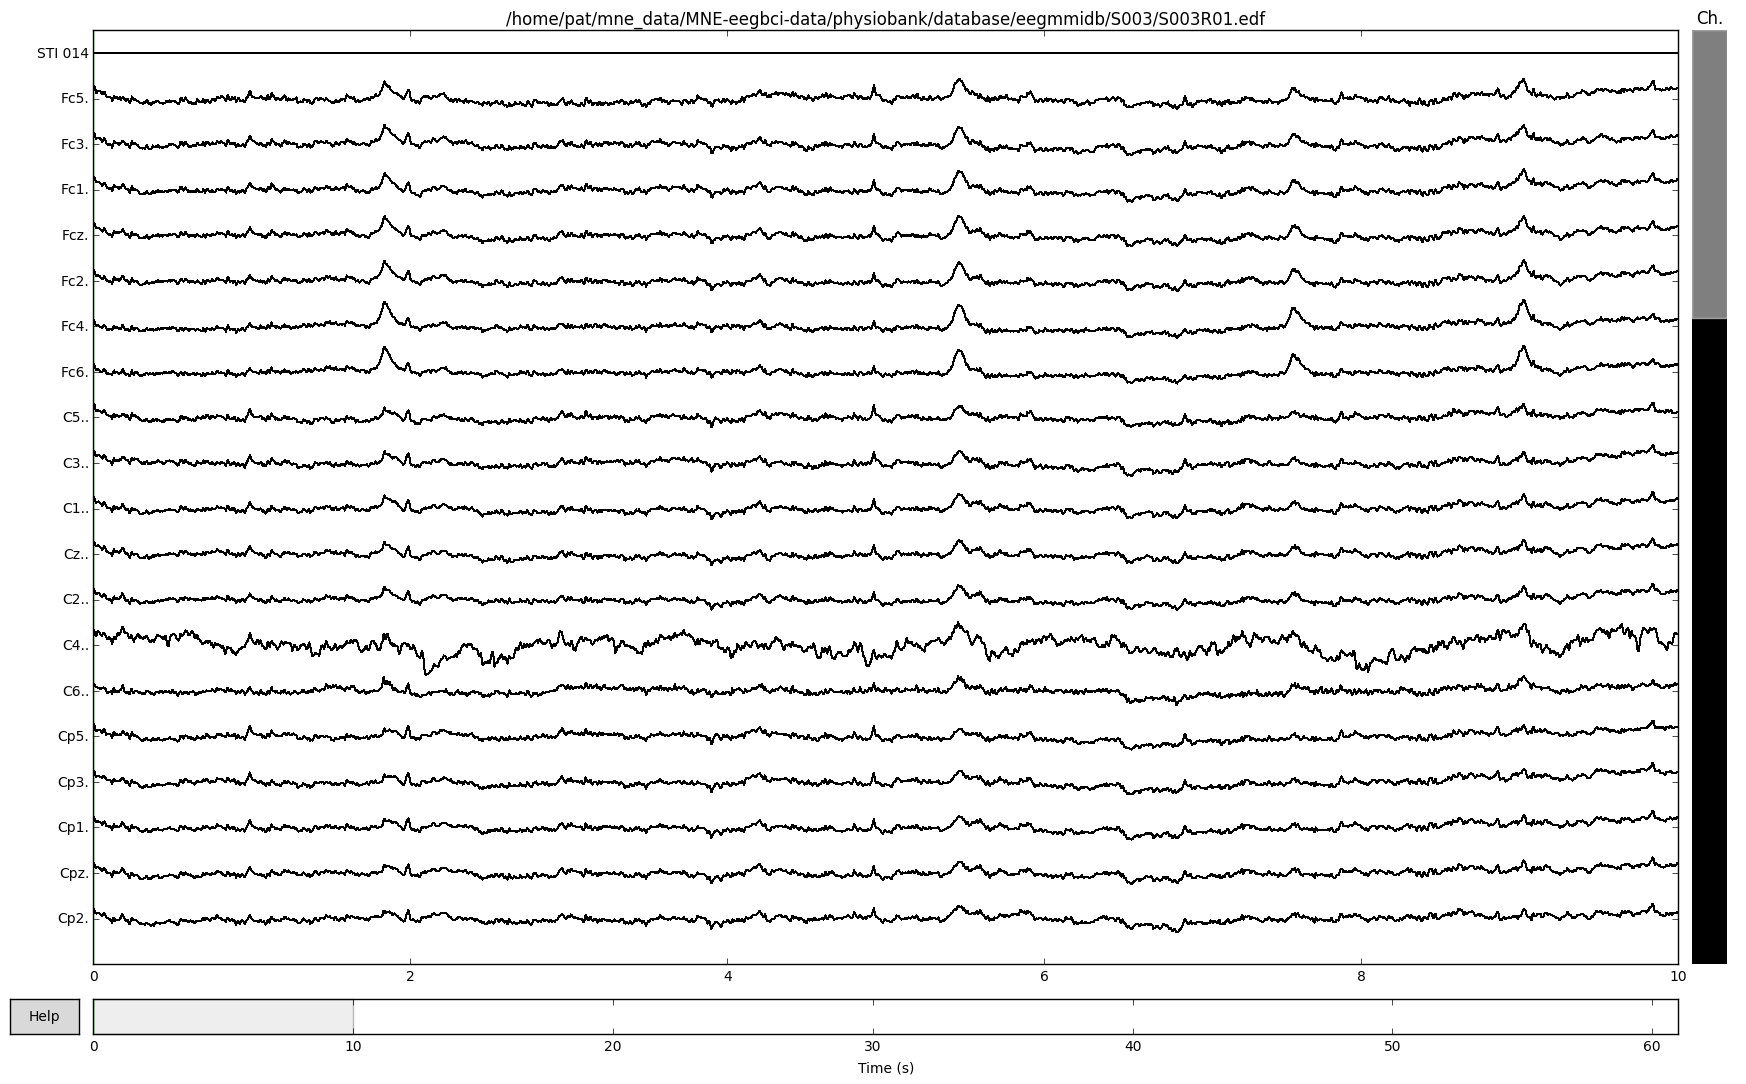

In [4]:
raw.plot(scalings = 'auto');

(Note that is also possible to create a raw file from scratch, given the channel names, sample frequency, and an array of data:)

In [5]:
ch_names = ['A', 'B'] # channel names
sfreq = 200 # sampling frequency, in hertz
info = mne.create_info(ch_names, sfreq) # See docs for full list of Info options.
samples = np.array([[-1, 0, -1, 1, 1], [0, 1, 0, -1, 0]]) # Samples for each channel
loadedRaw = mne.io.RawArray(samples, info)

Creating RawArray with float64 data, n_channels=2, n_times=5
    Range : 0 ... 4 =      0.000 ...     0.020 secs
Ready.


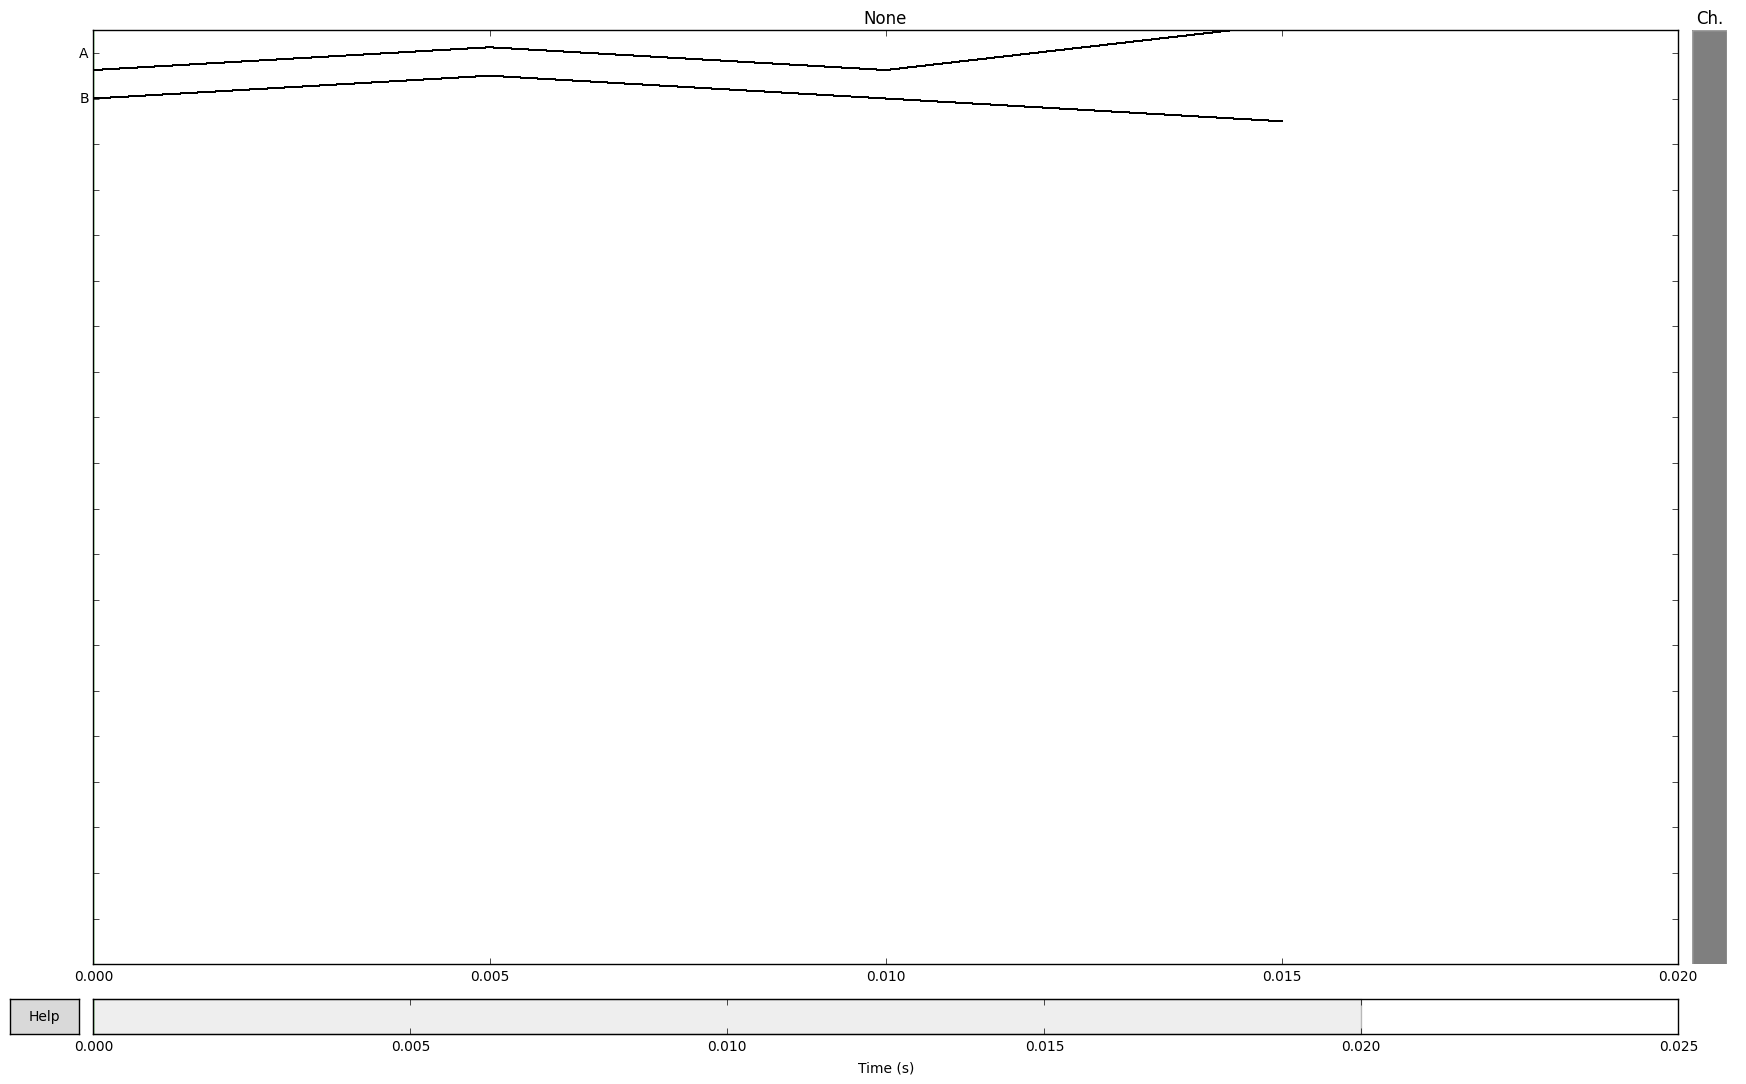

In [6]:
loadedRaw.plot(scalings='auto');

We can also look at the power spectral density plot of our data:

Effective window size : 12.800 (s)


/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


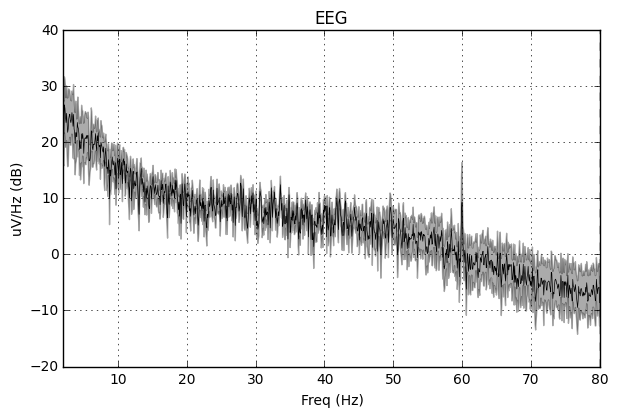

In [7]:
raw.plot_psd(tmin=0, tmax=60, fmin=2, fmax=80, average=True, spatial_colors=False);

Now that we have the raw data, we can filter the data to select the frequencies we're interested in.   
First of all, we want to remove the 60 Hz power line noise:

In [8]:
raw.notch_filter(60)

Setting up band-stop filter from 59 - 61 Hz
Filter length of 2112 samples (13.200 sec) selected


<RawEDF  |  S003R01.edf, n_channels x n_times : 65 x 9760 (61.0 sec), ~5.0 MB, data loaded>

Now we can remove very high and very low frequencies that are unlikely to contain the signal that is relevant to us. 

In [9]:
raw.filter(l_freq=1, h_freq=60) # only keeping frequencies between 1-60 Hz

Setting up band-pass filter from 1 - 60 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 15.0 Hz
Filter length of 1056 samples (6.600 sec) selected


<RawEDF  |  S003R01.edf, n_channels x n_times : 65 x 9760 (61.0 sec), ~5.0 MB, data loaded>

Notice how filtering changes the shape of the power spectral density plot:

Effective window size : 12.800 (s)


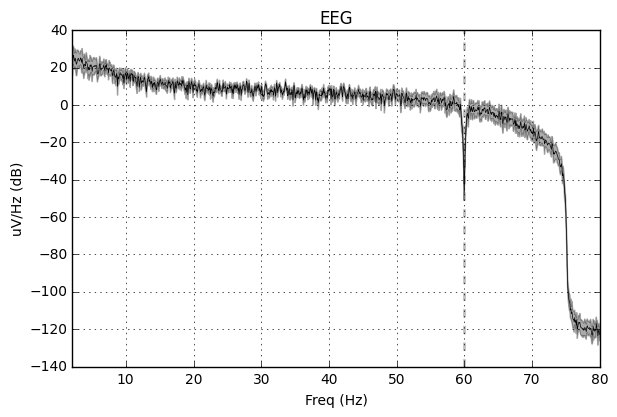

In [10]:
raw.plot_psd(tmin=0, tmax=60, fmin=2, fmax=80, average=True, spatial_colors=False);

We can now downsample the data: 

3611 events found
Events id: [1]
Resampling of the stim channels caused event information to become unreliable. Consider finding events on the original data and passing the event matrix as a parameter.
Effective window size : 17.067 (s)


<ipython-input-11-cacec6e1ee81>:2: RuntimeWarning: Resampling of the stim channels caused event information to become unreliable. Consider finding events on the original data and passing the event matrix as a parameter.
  raw.resample(120, npad='auto')


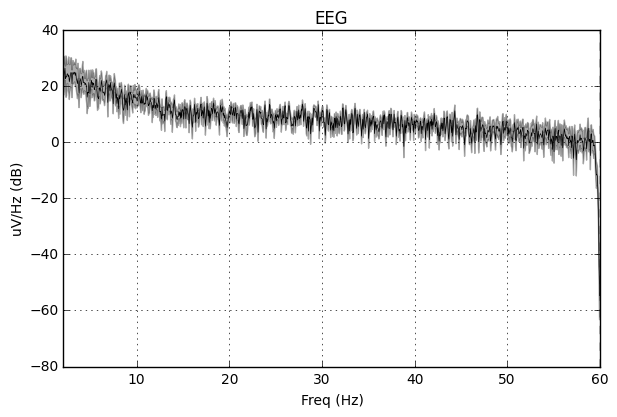

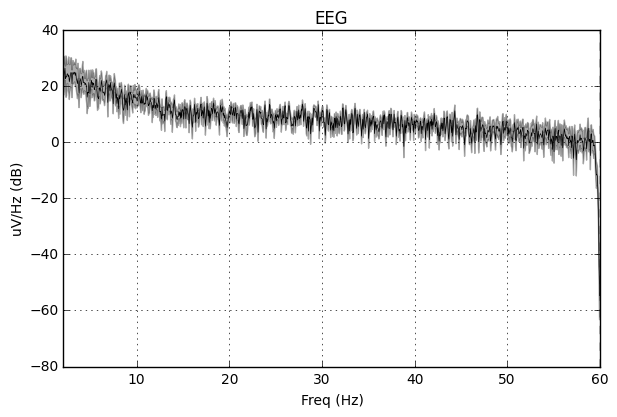

In [11]:
# Downsample a lot
raw.resample(120, npad='auto')
raw.plot_psd(tmin=0, tmax=60, fmin=2, fmax=120, average=True, spatial_colors=False);
# Notice that the max plotted frequency is 60, the nyquist rate!

After filtering and downsampling, we can look at the raw data again to see if there are any bad channels:  

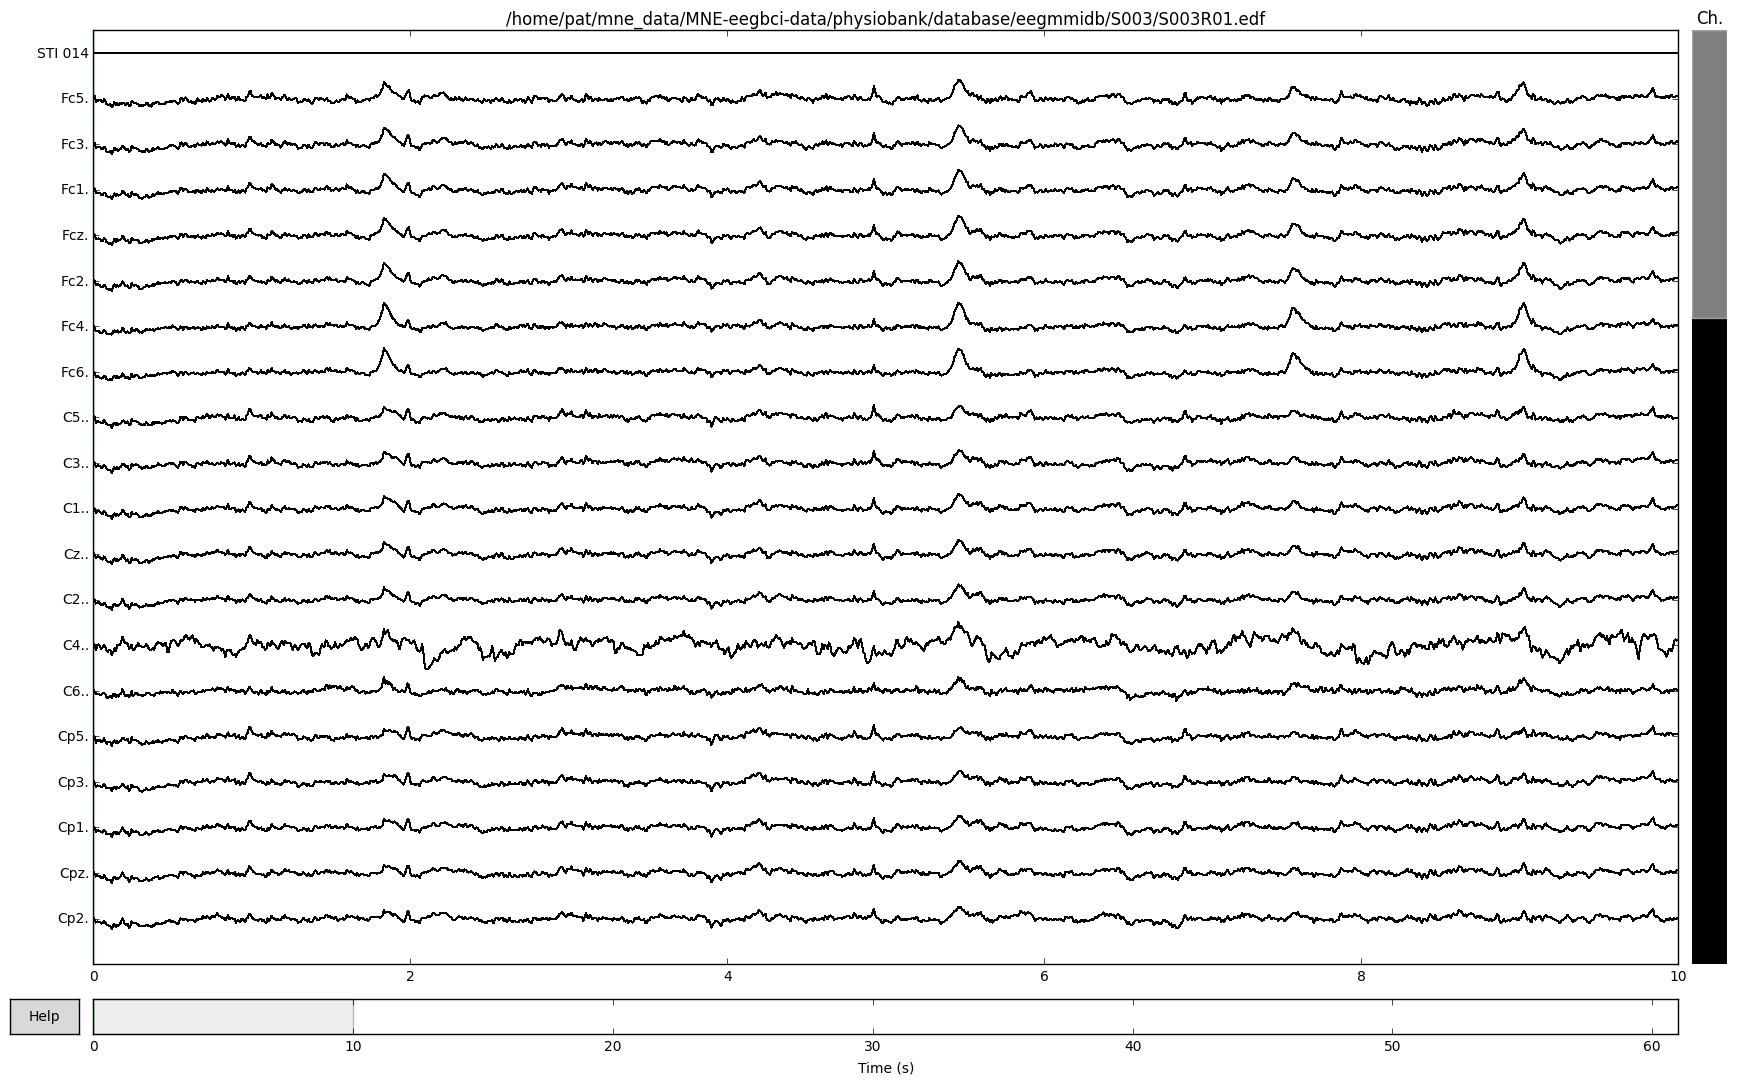

In [12]:
raw.plot(scalings = 'auto');

You may notice from the plot above that the channel C4 looks significantly noisier than the others. We can then flag it as a 'bad' channel and remove it: 

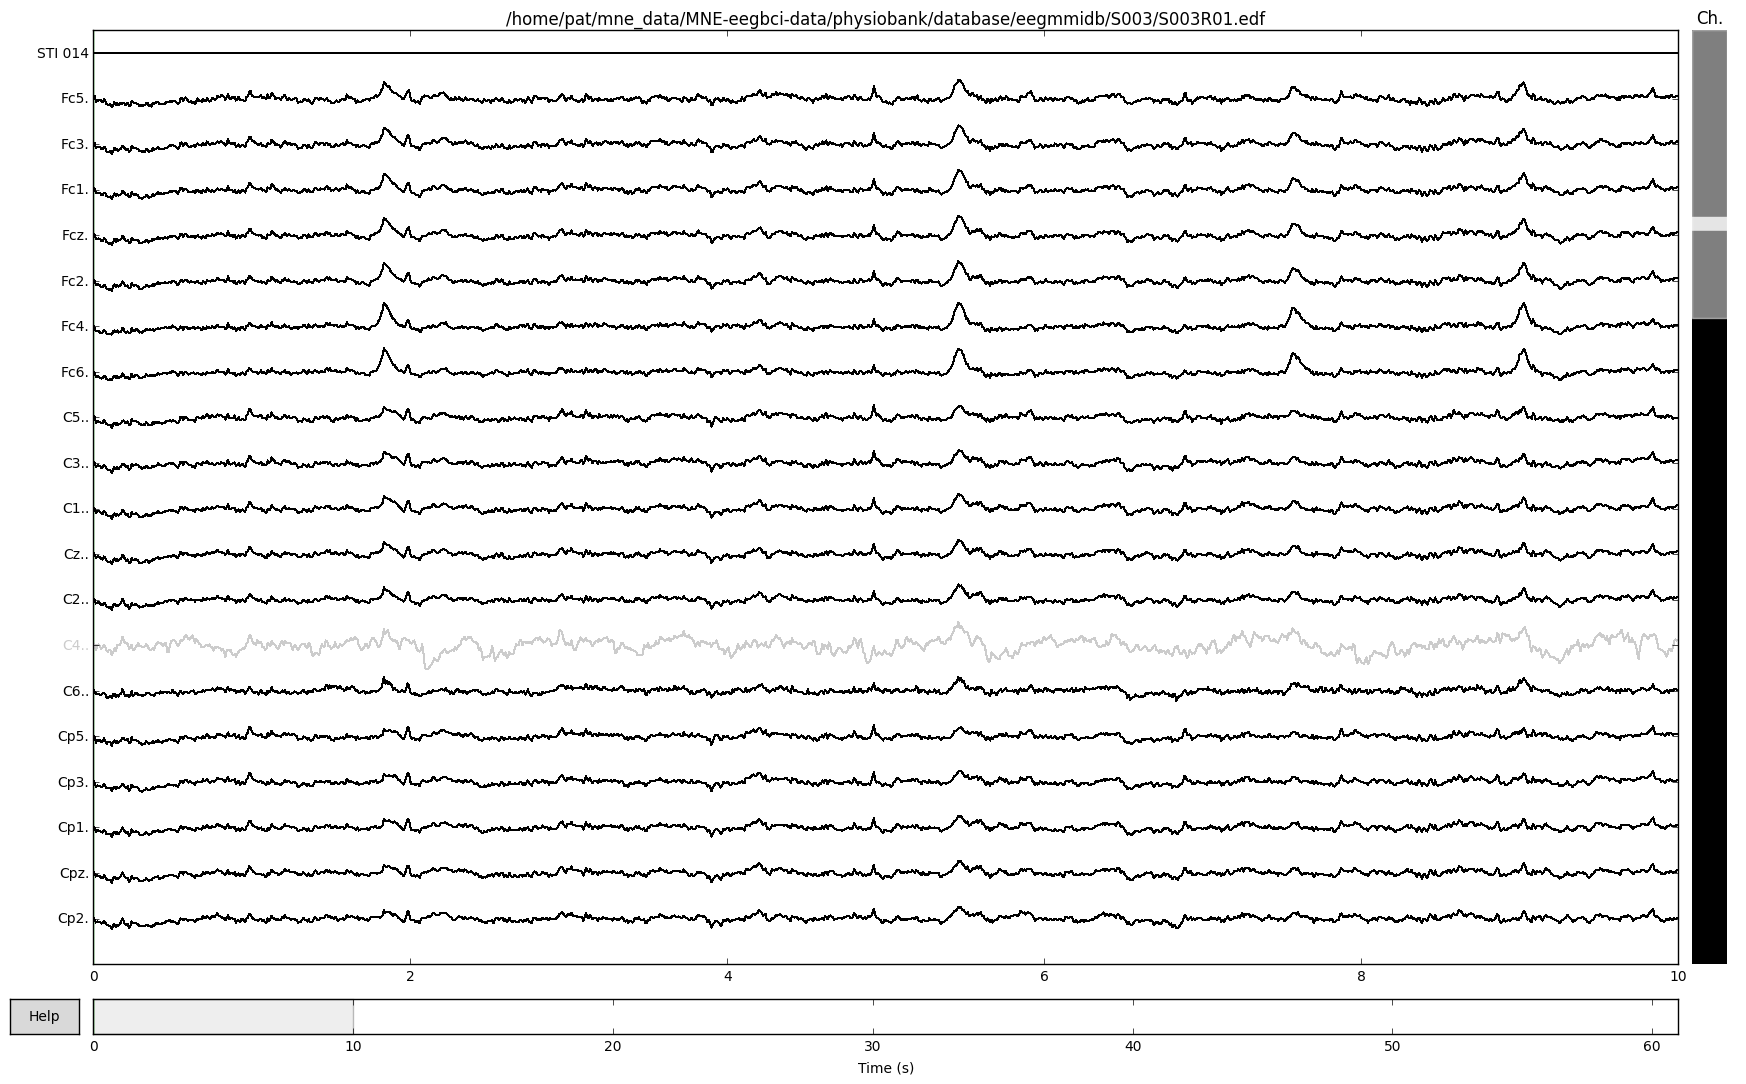

In [13]:
raw.info['bads'] += ['C4..']
picks = mne.pick_types(raw.info, exclude='bads')
raw.plot(scalings='auto');

Now that we have removed a channel, we can interpolate the data coming from that channel via spherical spline interpolation. 

In order to be able to do that, we need to make sure that our channels have location information:

In [14]:
print(raw.info['chs'])

[{'loc': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), 'ch_name': u'Fc5.', 'unit_mul': 0.0, 'coord_frame': 4, 'range': 16184.0, 'unit': 107, 'cal': 16184.0, 'coil_type': 1, 'scanno': 1, 'kind': 2, 'logno': 1}, {'loc': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), 'ch_name': u'Fc3.', 'unit_mul': 0.0, 'coord_frame': 4, 'range': 16184.0, 'unit': 107, 'cal': 16184.0, 'coil_type': 1, 'scanno': 2, 'kind': 2, 'logno': 2}, {'loc': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), 'ch_name': u'Fc1.', 'unit_mul': 0.0, 'coord_frame': 4, 'range': 16184.0, 'unit': 107, 'cal': 16184.0, 'coil_type': 1, 'scanno': 3, 'kind': 2, 'logno': 3}, {'loc': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), 'ch_name': u'Fcz.', 'unit_mul': 0.0, 'coord_frame': 4, 'range': 16184.0, 'unit': 107, 'cal': 16184.0, 'coil_type': 1, 'scanno': 4, 'kind': 2, 'logno': 4}, {'loc': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

You can see that all the locations (the 'loc' attributes) are at 0, meaning that we don't have accurate location info. However, assuming that the data was recorded from a headset using the standard 10-20 system, we can load a pre-configured channel location file and use that instead. 

In [15]:
montage = mne.channels.read_montage('standard_1020')
raw.rename_channels(mapping= lambda name: name.replace(".",""))
raw.set_montage(montage)

<RawEDF  |  S003R01.edf, n_channels x n_times : 65 x 7320 (61.0 sec), ~3.8 MB, data loaded>

Now we can interpolate the bad channel and see what the reconstructed channel looks like.

Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors


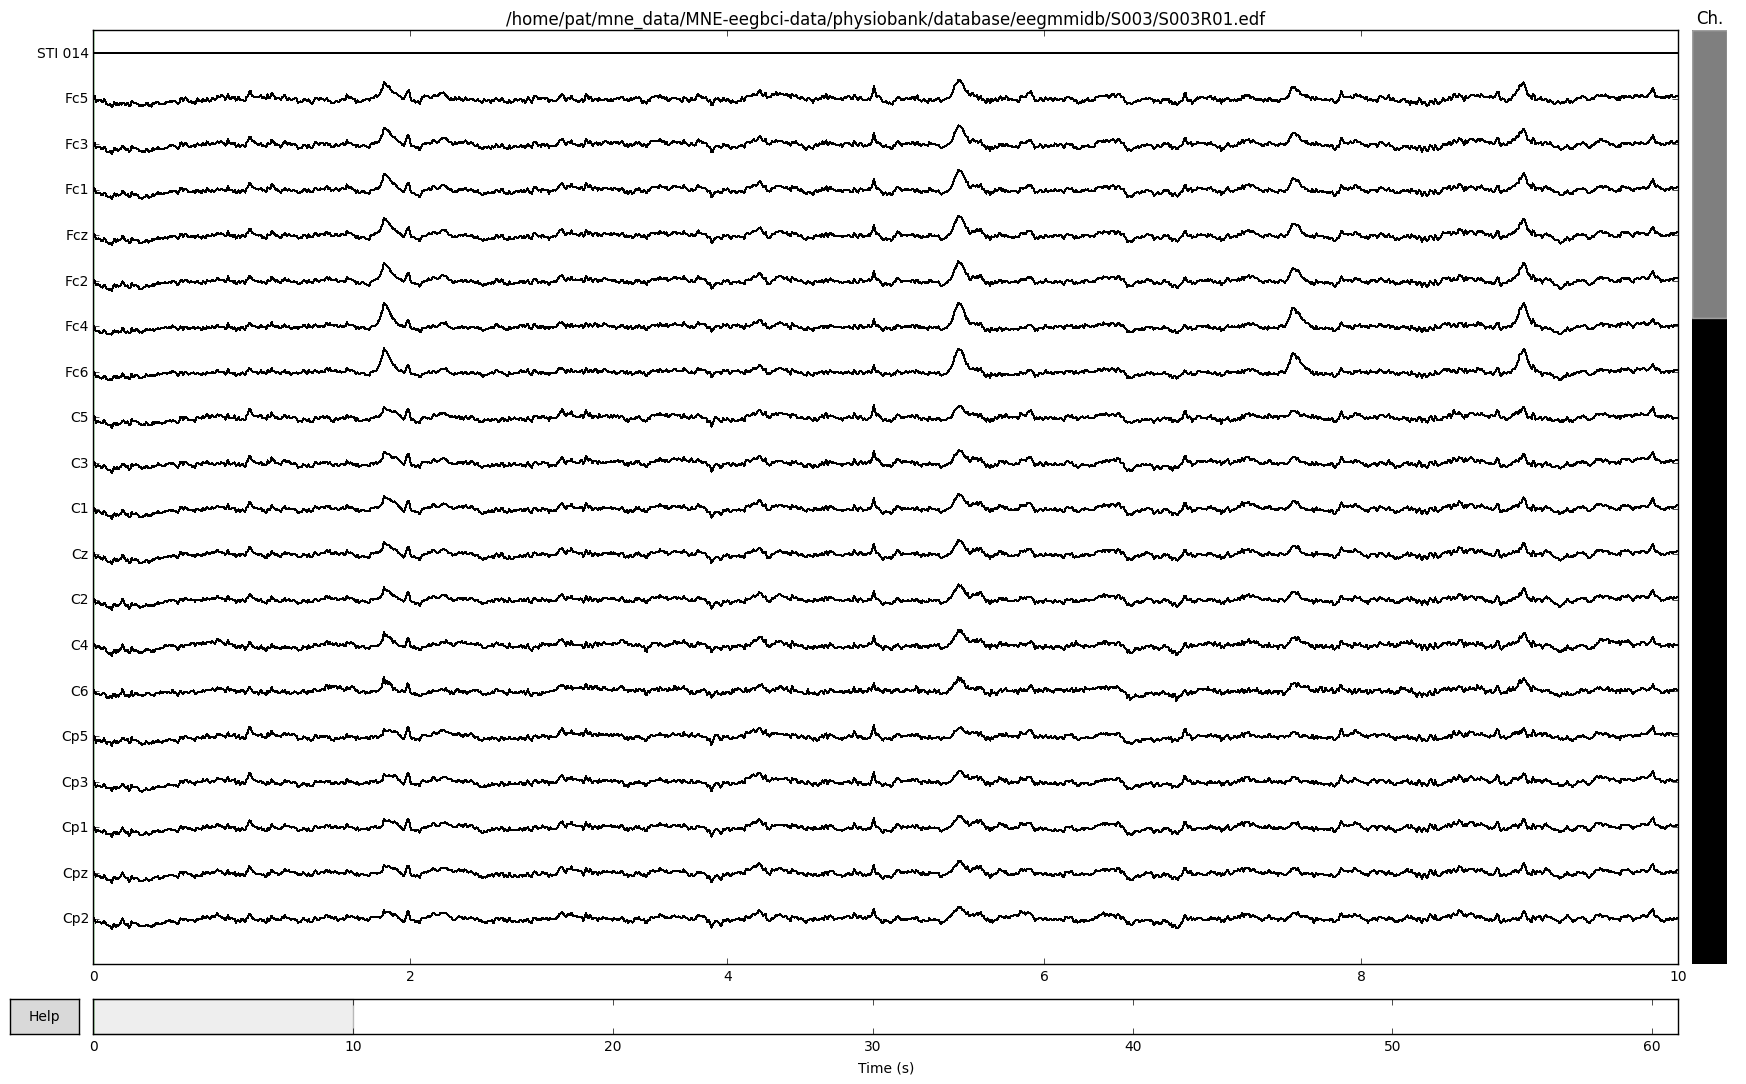

In [16]:
raw.interpolate_bads(reset_bads=True)
raw.plot(scalings='auto');

Now that we have somewhat cleaned-up data, we can run ICA to try and localize the signal:

In [17]:
from mne.preprocessing import ICA
num_components = 15 #play around with this number to get components that seem to represent the actual brain activations well
ica = ICA(n_components=num_components, method='fastica')
ica.fit(raw)

Fitting ICA to data using 64 channels. 
Please be patient, this may take some time
Inferring max_pca_components from picks.
Selection by number: 15 components


<ICA  |  raw data decomposition, fit (fastica): 7320 samples, 15 components, channels used: "eeg">

Once the components have been computed, we can plot them on a model of the scalp: 

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


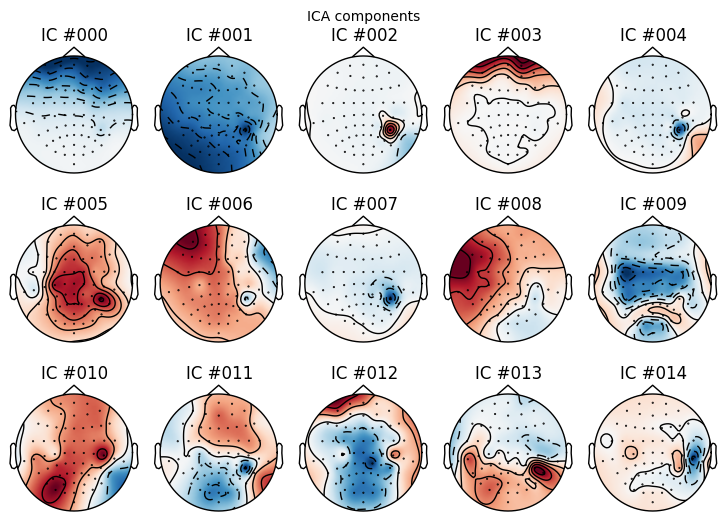

In [ ]:
ica.plot_components();

We can now reject components that appear artifactual. To do so, we can visualize each component's properties first:

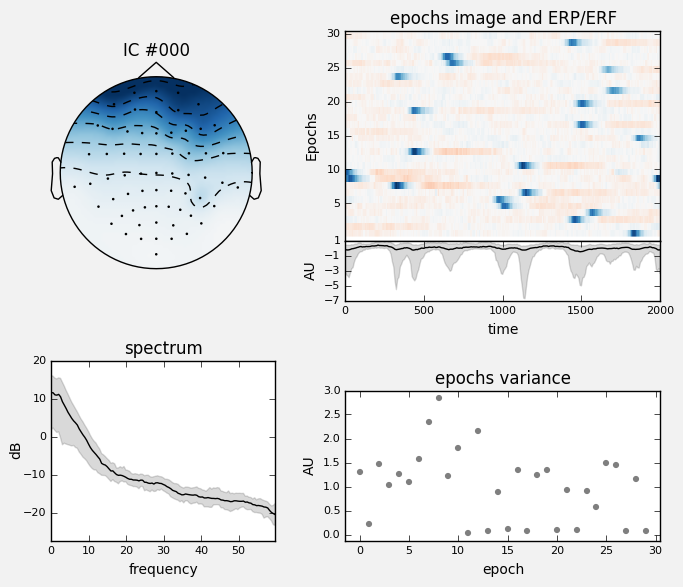

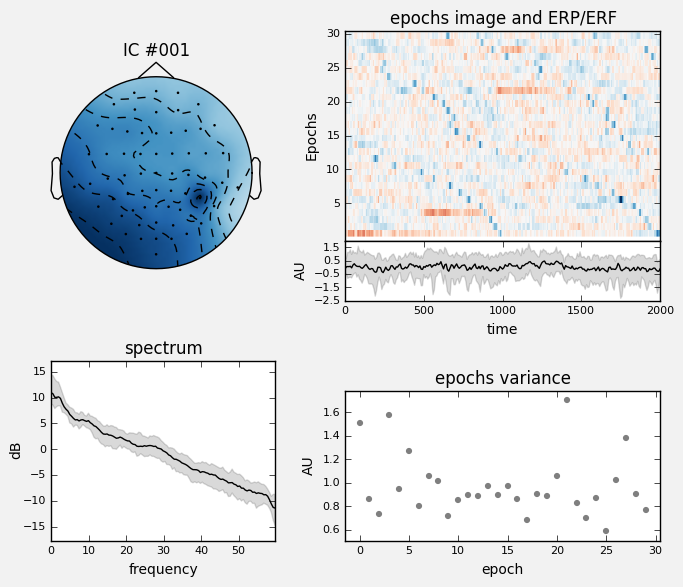

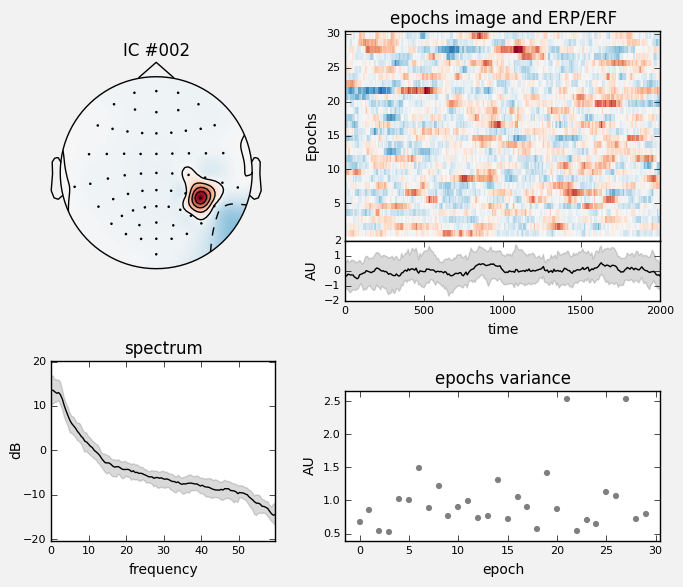

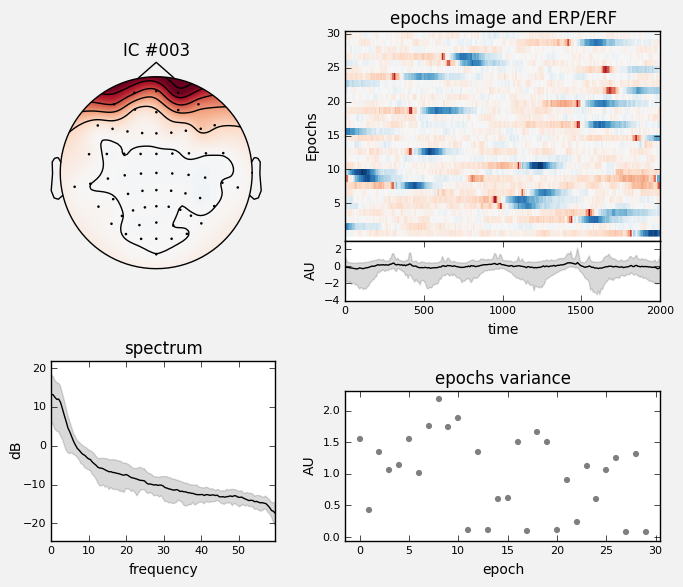

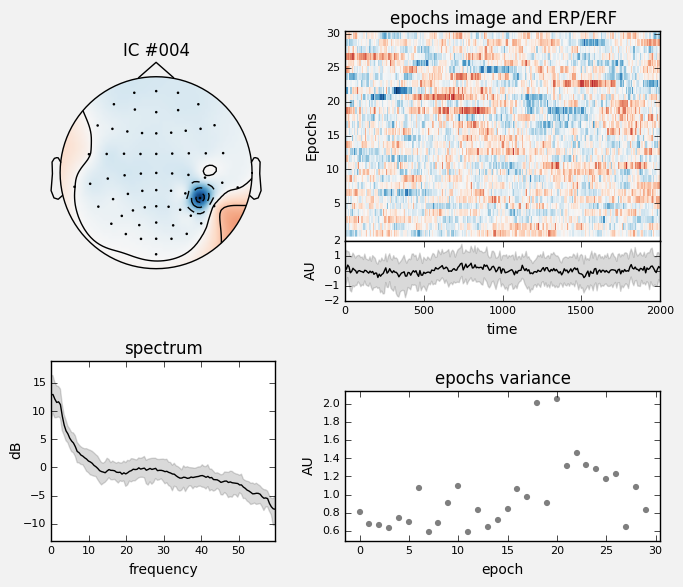

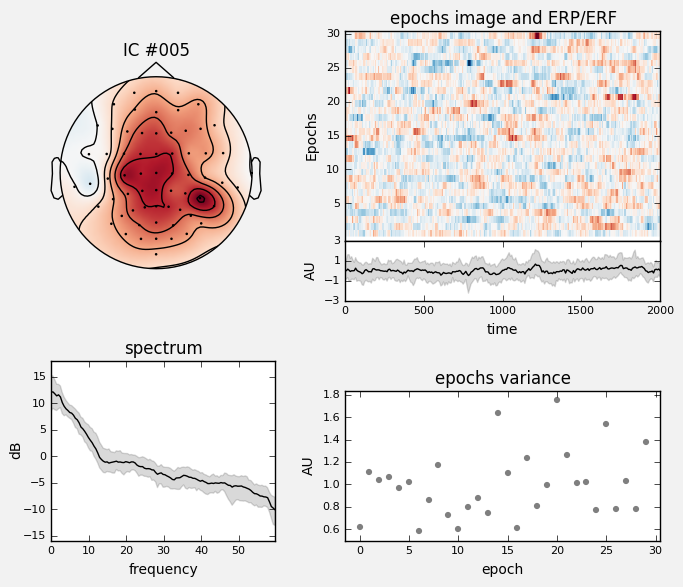

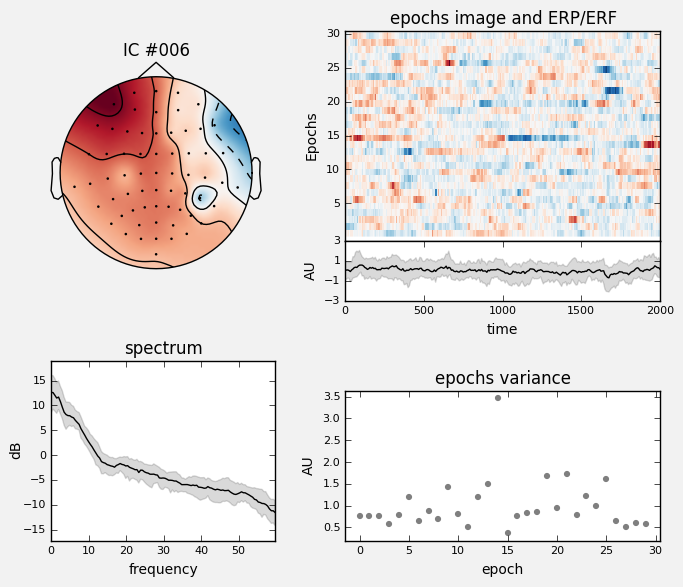

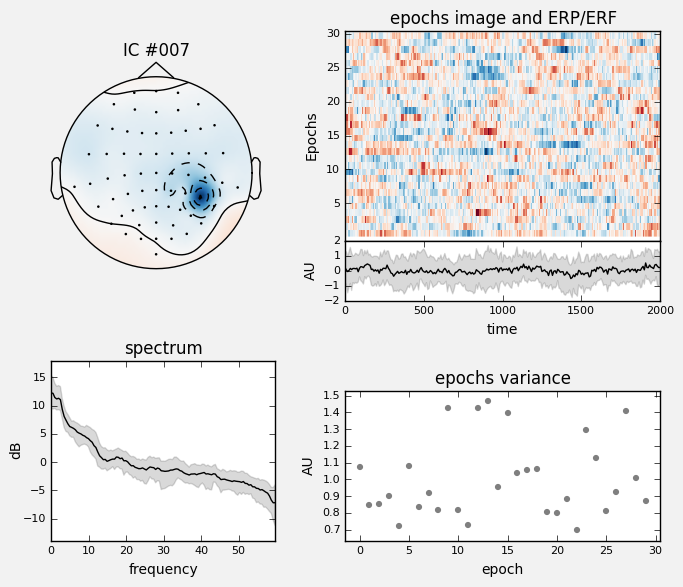

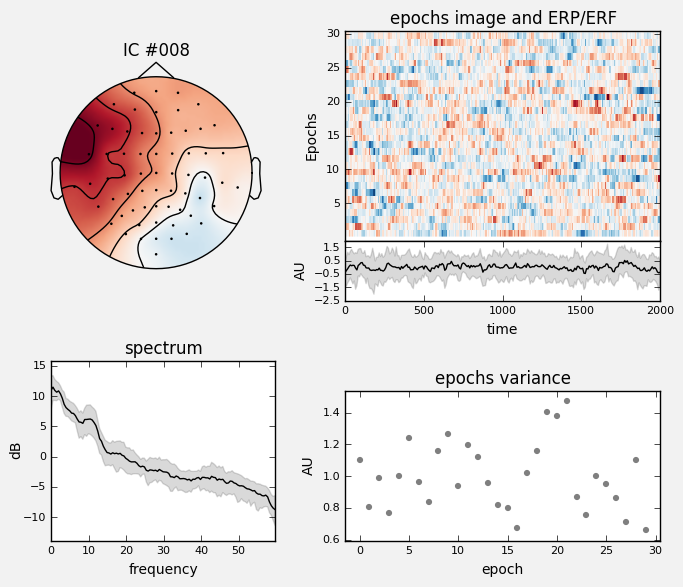

In [ ]:
ica.plot_properties(raw, picks=range(num_components));

This might seem like a lot of information. One commonly used heuristic is looking at the spectum of each component. Ideally, each spectrum will have a $\dfrac 1 x$ - like shape: 

In [ ]:
ica.plot_properties(raw, picks=7); # This exact component number probably won't work if you recompute ICA

...while outlier components will have increasing intensity for higher frequencies, like in this example: 

In [ ]:
ica.plot_properties(raw, picks=9); # This exact component number probably won't work if you recompute ICA

We can now see what our data looks like with the bad component removed:

In [ ]:
ica.plot_overlay(raw, exclude=[9]);